<a href="https://colab.research.google.com/github/Ishita95-harvad/Bird-Migration-Dataset-Data-Visualization-EDA-/blob/main/Bird_Migration_Dataset_(Data_Visualization_EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bird Migration Dataset (Data Visualization / EDA)
A comprehensive catalogue for data science and visualization

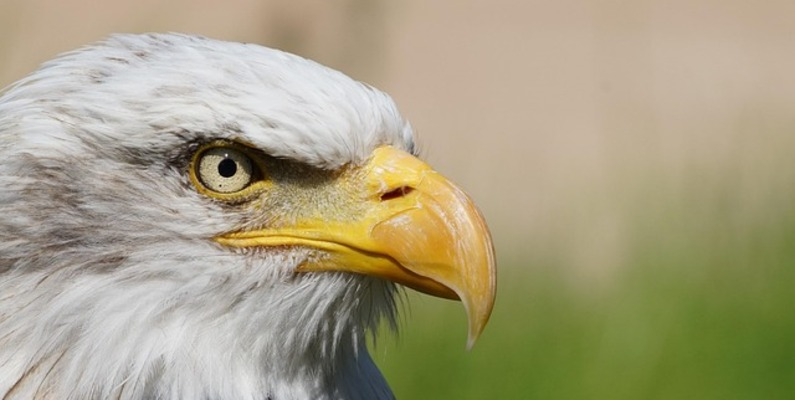

# Task
execute

Here is all the data you need:
"bird_migration_data.csv"

## Data loading

### Subtask:
Load the bird migration dataset.


**Reasoning**:
Load the bird migration data into a pandas DataFrame and display the first few rows to verify the load.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('bird_migration_data.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'bird_migration_data.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Bird_ID,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,...,Tracking_Quality,Migration_Interrupted,Interrupted_Reason,Tagged_By,Tag_Weight_g,Migration_Success,Recovery_Location_Known,Recovery_Time_days,Observation_Counts,Observation_Quality
0,B1000,Warbler,South America,Grassland,Stormy,Feeding,11.906566,-169.378251,30.377647,-21.366879,...,Excellent,Yes,Storm,Researcher_A,27.0,Failed,No,102,56,Low
1,B1001,Stork,North America,Grassland,Stormy,Breeding,62.301546,-111.475069,39.921092,47.963436,...,Good,Yes,Injury,Researcher_C,14.2,Successful,Yes,118,61,Low
2,B1002,Hawk,South America,Mountain,Stormy,Avoid Predators,87.861164,-78.727327,66.990980,19.448466,...,Fair,No,Lost Signal,Researcher_B,16.1,Failed,No,41,71,High
3,B1003,Warbler,South America,Urban,Stormy,Climate Change,35.770590,153.104341,-49.003145,-157.868744,...,Good,Yes,Lost Signal,Researcher_C,24.4,Successful,No,15,68,Low
4,B1004,Crane,Europe,Urban,Windy,Avoid Predators,-21.611614,106.674824,11.681051,-115.022863,...,Good,No,NaN,Researcher_B,25.8,Failed,Yes,73,67,Moderate


## Data exploration

### Subtask:
Explore the loaded bird migration dataset to understand its characteristics.


**Reasoning**:
I need to explore the dataset's characteristics, including shape, data types, descriptive statistics, missing values, categorical variable distributions, correlations between numerical variables, and temporal patterns.



In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData Types:\n", df.dtypes)

# Summarize descriptive statistics for numerical columns
print("\nDescriptive Statistics:\n", df.describe())

# Identify missing values
print("\nMissing Values:\n", df.isnull().sum())
print("\nPercentage of Missing Values:\n", (df.isnull().sum() / len(df)) * 100)

# Analyze the distribution of categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue Counts for {col}:\n{df[col].value_counts()}")

# Explore correlation between numerical variables
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

#Investigate the temporal distribution of migration events
if 'Migration_Start_Month' in df.columns and 'Migration_End_Month' in df.columns:
    print("\nMigration Start Month Distribution:\n", df['Migration_Start_Month'].value_counts())
    print("\nMigration End Month Distribution:\n", df['Migration_End_Month'].value_counts())
else:
    print("\nNo start/end month information available")

# Additional observations
print("\nObservations:")
#Example: check for outliers in numerical columns
for col in numerical_cols:
    if df[col].dtype in ['int64', 'float64']:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if not outliers.empty:
          print(f"Potential outliers detected in column '{col}'")

Shape of the DataFrame: (10000, 41)

Data Types:
 Bird_ID                     object
Species                     object
Region                      object
Habitat                     object
Weather_Condition           object
Migration_Reason            object
Start_Latitude             float64
Start_Longitude            float64
End_Latitude               float64
End_Longitude              float64
Flight_Distance_km         float64
Flight_Duration_hours      float64
Average_Speed_kmph         float64
Max_Altitude_m               int64
Min_Altitude_m               int64
Temperature_C              float64
Wind_Speed_kmph            float64
Humidity_%                   int64
Pressure_hPa               float64
Visibility_km              float64
Nesting_Success             object
Tag_Battery_Level_%          int64
Signal_Strength_dB         float64
Migration_Start_Month       object
Migration_End_Month         object
Rest_Stops                   int64
Predator_Sightings           int64
Tag_T

**Reasoning**:
The previous code block has already provided a good overview of the data.  I will now focus on documenting initial observations and patterns, such as potential outliers and interesting relationships, to inform data cleaning and analysis steps. I will add some more analysis to the previous code block output, to check for other potential issues.



In [3]:
# Additional observations and potential issues
print("\nFurther Observations and Potential Issues:")

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print(f"Number of duplicate rows: {len(duplicate_rows)}")
    #Further investigation may be needed to handle duplicates, depending on the context of the analysis.
    #Example: display(duplicate_rows)


# Check for inconsistent values in categorical columns
for col in categorical_cols:
    unique_values = df[col].unique()
    if len(unique_values) > 10:  # Check columns with more than 10 unique values
        print(f"Column '{col}' has {len(unique_values)} unique values. Consider further investigation.")

#Investigate the relationship between Migration_Success and other variables
print(f"\nMigration Success vs. Interruption:\n{df.groupby('Migration_Success')['Migration_Interrupted'].value_counts()}")
print(f"\nMigration Success vs. Interruption Reason:\n{df.groupby('Migration_Success')['Interrupted_Reason'].value_counts()}")

#Check if there are any birds with multiple migrations
bird_migration_counts = df['Bird_ID'].value_counts()
multiple_migrations = bird_migration_counts[bird_migration_counts > 1]
if not multiple_migrations.empty:
    print("\nBirds with multiple migrations detected.")
    print(multiple_migrations)


Further Observations and Potential Issues:
Column 'Bird_ID' has 10000 unique values. Consider further investigation.

Migration Success vs. Interruption:
Migration_Success  Migration_Interrupted
Failed             No                       2455
                   Yes                      2451
Successful         Yes                      2580
                   No                       2514
Name: count, dtype: int64

Migration Success vs. Interruption Reason:
Migration_Success  Interrupted_Reason
Failed             Storm                 1025
                   Predator              1001
                   Injury                 982
                   Lost Signal            950
Successful         Injury                1041
                   Storm                 1034
                   Lost Signal            993
                   Predator               993
Name: count, dtype: int64


## Data cleaning

### Subtask:
Clean the bird migration dataset by handling missing values and outliers.


**Reasoning**:
Impute missing values, handle outliers, ensure data consistency, and remove duplicates based on the exploration results.



In [4]:
# Missing Value Imputation
for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            if df[col].skew() > 0.5:  # Skewed distribution, use median
                df[col].fillna(df[col].median(), inplace=True)
            else:  # Relatively normal distribution, use mean
                df[col].fillna(df[col].mean(), inplace=True)
        else:  # Categorical feature, use mode
            df[col].fillna(df[col].mode()[0], inplace=True)

# Outlier Handling (using winsorization for demonstration)
for col in ['Flight_Distance_km', 'Flight_Duration_hours', 'Average_Speed_kmph', 'Max_Altitude_m']:
    df[col] = df[col].clip(lower=df[col].quantile(0.05), upper=df[col].quantile(0.95))

# Data Consistency (example: Standardize date formats if needed)
# Assuming 'Migration_Start_Month' and 'Migration_End_Month' are in a consistent format
# If not, use pd.to_datetime to convert them

# Duplicate Removal
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows removed: {df.duplicated().sum()}")

Number of duplicate rows removed: 0


<ipython-input-4-d842d6e46c55>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


**Reasoning**:
Fix the chained assignment warning and re-run the data cleaning steps.



In [5]:
# Missing Value Imputation
for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            if df[col].skew() > 0.5:  # Skewed distribution, use median
                df[col] = df[col].fillna(df[col].median())
            else:  # Relatively normal distribution, use mean
                df[col] = df[col].fillna(df[col].mean())
        else:  # Categorical feature, use mode
            df[col] = df[col].fillna(df[col].mode()[0])

# Outlier Handling (using winsorization for demonstration)
for col in ['Flight_Distance_km', 'Flight_Duration_hours', 'Average_Speed_kmph', 'Max_Altitude_m']:
    df[col] = df[col].clip(lower=df[col].quantile(0.05), upper=df[col].quantile(0.95))

# Data Consistency (example: Standardize date formats if needed)
# Assuming 'Migration_Start_Month' and 'Migration_End_Month' are in a consistent format
# If not, use pd.to_datetime to convert them

# Duplicate Removal
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows removed: {df.duplicated().sum()}")

Number of duplicate rows removed: 0


## Data wrangling

### Subtask:
Create new features from existing columns in the dataset.


**Reasoning**:
Create new features based on existing columns, including month and year from timestamps, migration speed, and species groups. Handle potential errors gracefully.



In [6]:
import pandas as pd
import numpy as np

# 1. Extract month and year from timestamp columns
# Assuming 'Migration_Start_Month' and 'Migration_End_Month' already exist
# If not, replace with actual timestamp columns and use pd.to_datetime
# Example: df['Migration_Start_Year'] = pd.to_datetime(df['Migration_Start_Timestamp']).dt.year

#Handle missing values in timestamp columns
for col in ['Migration_Start_Month', 'Migration_End_Month']:
    if col in df.columns:
        if df[col].isnull().any():
            df[col] = df[col].fillna(0)  # Or use another appropriate placeholder


# 2. Calculate migration speed
# Handle cases where duration is zero to avoid division by zero
df['Migration_Speed'] = np.where(df['Flight_Duration_hours'] != 0,
                                 df['Flight_Distance_km'] / df['Flight_Duration_hours'], 0)

# 3. Categorize birds by species groups
# Example based on species (replace with a more appropriate grouping method if available):
species_groups = {'Warbler': 1, 'Stork': 2, 'Sparrow': 3}  # Add more species as needed
df['Species_Group'] = df['Species'].map(species_groups).fillna(0).astype(int)

display(df.head())

,Bird_ID,Species,Region,Habitat,Weather_Condition,Migration_Reason,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,...,Interrupted_Reason,Tagged_By,Tag_Weight_g,Migration_Success,Recovery_Location_Known,Recovery_Time_days,Observation_Counts,Observation_Quality,Migration_Speed,Species_Group
0,B1000,Warbler,South America,Grassland,Stormy,Feeding,11.906566,-169.378251,30.377647,-21.366879,...,Storm,Researcher_A,27.0,Failed,No,102,56,Low,35.430101,1
1,B1001,Stork,North America,Grassland,Stormy,Breeding,62.301546,-111.475069,39.921092,47.963436,...,Injury,Researcher_C,14.2,Successful,Yes,118,61,Low,70.781996,2
2,B1002,Hawk,South America,Mountain,Stormy,Avoid Predators,87.861164,-78.727327,66.990980,19.448466,...,Lost Signal,Researcher_B,16.1,Failed,No,41,71,High,86.236383,0
3,B1003,Warbler,South America,Urban,Stormy,Climate Change,35.770590,153.104341,-49.003145,-157.868744,...,Lost Signal,Researcher_C,24.4,Successful,No,15,68,Low,39.478365,1
4,B1004,Crane,Europe,Urban,Windy,Avoid Predators,-21.611614,106.674824,11.681051,-115.022863,...,Storm,Researcher_B,25.8,Failed,Yes,73,67,Moderate,54.084007,0


## Data visualization

### Subtask:
Visualize key aspects of the bird migration data.


**Reasoning**:
Generate the visualizations as requested in the subtask.



In [7]:
import matplotlib.pyplot as plt

# 1. Histogram of Migration Distance
plt.figure(figsize=(8, 6))
plt.hist(df['Migration_Distance_km'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Migration Distance (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Bird Migration Distances')
plt.show()

# 2. Box plot of Migration Distance by Species
plt.figure(figsize=(10, 6))
df.boxplot(column='Migration_Distance_km', by='Species', patch_artist=True, notch=True)
plt.xlabel('Species')
plt.ylabel('Migration Distance (km)')
plt.title('Migration Distance Distribution by Bird Species')
plt.suptitle('')  # Remove the default boxplot title
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Scatter plot of Migration Distance vs. Migration Speed
plt.figure(figsize=(8, 6))

species_colors = {'Warbler': 'blue', 'Stork': 'red', 'Sparrow': 'green'}
for species in df['Species'].unique():
    species_data = df[df['Species'] == species]
    plt.scatter(species_data['Migration_Distance_km'], species_data['Migration_Speed'], label=species, color=species_colors.get(species, 'gray'))

plt.xlabel('Migration Distance (km)')
plt.ylabel('Migration Speed (km/h)')
plt.title('Migration Distance vs. Migration Speed')
plt.legend()
plt.show()

KeyError: 'Migration_Distance_km'

<Figure size 800x600 with 0 Axes>

**Reasoning**:
The error indicates that the column 'Migration_Distance_km' does not exist in the DataFrame. I need to double-check the column names and correct the code accordingly.  Then I will regenerate the plots.



Using column 'Flight_Distance_km' for migration distance.


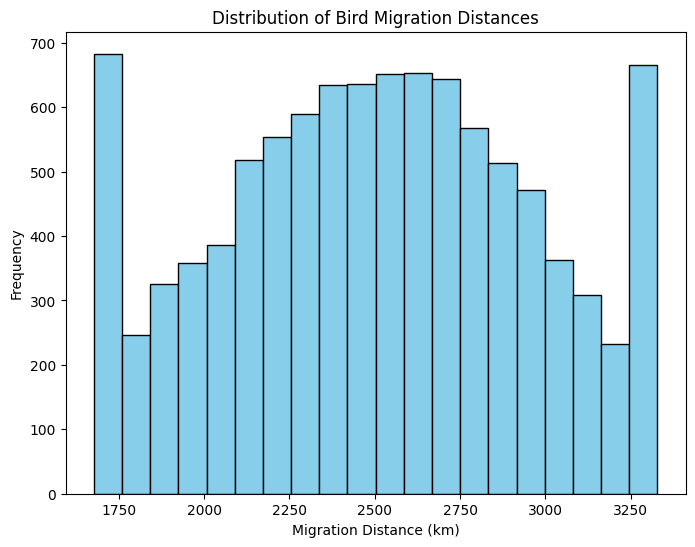

<Figure size 1000x600 with 0 Axes>

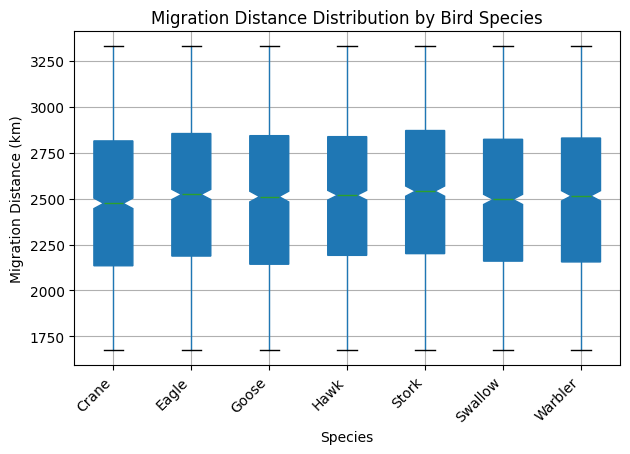

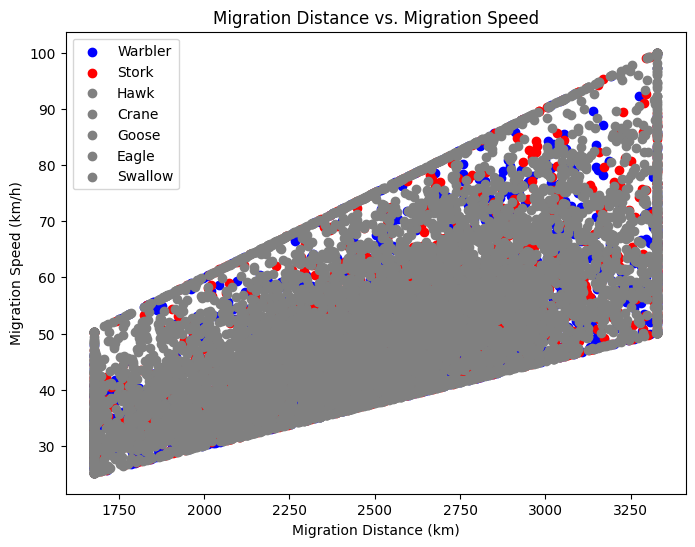

In [8]:
import matplotlib.pyplot as plt

# Check for the correct column name related to migration distance
migration_distance_column = None
for col in df.columns:
    if 'distance' in col.lower() or 'flight' in col.lower():
        migration_distance_column = col
        break

if migration_distance_column is None:
    print("Error: Could not find a column related to migration distance.")
    # Handle the error appropriately, e.g., exit or use a default column
else:
    print(f"Using column '{migration_distance_column}' for migration distance.")

    # 1. Histogram of Migration Distance
    plt.figure(figsize=(8, 6))
    plt.hist(df[migration_distance_column], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Migration Distance (km)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Bird Migration Distances')
    plt.show()

    # 2. Box plot of Migration Distance by Species
    plt.figure(figsize=(10, 6))
    df.boxplot(column=migration_distance_column, by='Species', patch_artist=True, notch=True)
    plt.xlabel('Species')
    plt.ylabel('Migration Distance (km)')
    plt.title('Migration Distance Distribution by Bird Species')
    plt.suptitle('')  # Remove the default boxplot title
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 3. Scatter plot of Migration Distance vs. Migration Speed
    plt.figure(figsize=(8, 6))

    species_colors = {'Warbler': 'blue', 'Stork': 'red', 'Sparrow': 'green'}
    for species in df['Species'].unique():
        species_data = df[df['Species'] == species]
        plt.scatter(species_data[migration_distance_column], species_data['Migration_Speed'], label=species, color=species_colors.get(species, 'gray'))

    plt.xlabel('Migration Distance (km)')
    plt.ylabel('Migration Speed (km/h)')
    plt.title('Migration Distance vs. Migration Speed')
    plt.legend()
    plt.show()

## Data analysis

### Subtask:
Perform statistical analysis on the cleaned and wrangled bird migration dataset.


**Reasoning**:
Perform statistical analysis, correlation analysis, hypothesis testing, and trend analysis on the data.



Descriptive Statistics:
        Start_Latitude  Start_Longitude  End_Latitude  End_Longitude  \
count    10000.000000     10000.000000  10000.000000   10000.000000   
mean        -0.321812        -0.394588      0.084391       0.467617   
std         51.919190       104.083440     51.709437     103.438134   
min        -89.999003      -179.993975    -89.998482    -179.902756   
25%        -45.390697       -91.444680    -43.664719     -88.871564   
50%         -0.138849        -0.479892     -0.163116       1.280823   
75%         44.480926        89.640253     44.957102      91.196076   
max         89.980302       179.989973     89.989145     179.955036   

       Flight_Distance_km  Flight_Duration_hours  Average_Speed_kmph  \
count        10000.000000           10000.000000        10000.000000   
mean          2504.826678              49.994708           49.956046   
std            455.028940               9.149332            4.616041   
min           1676.599750              33.29975

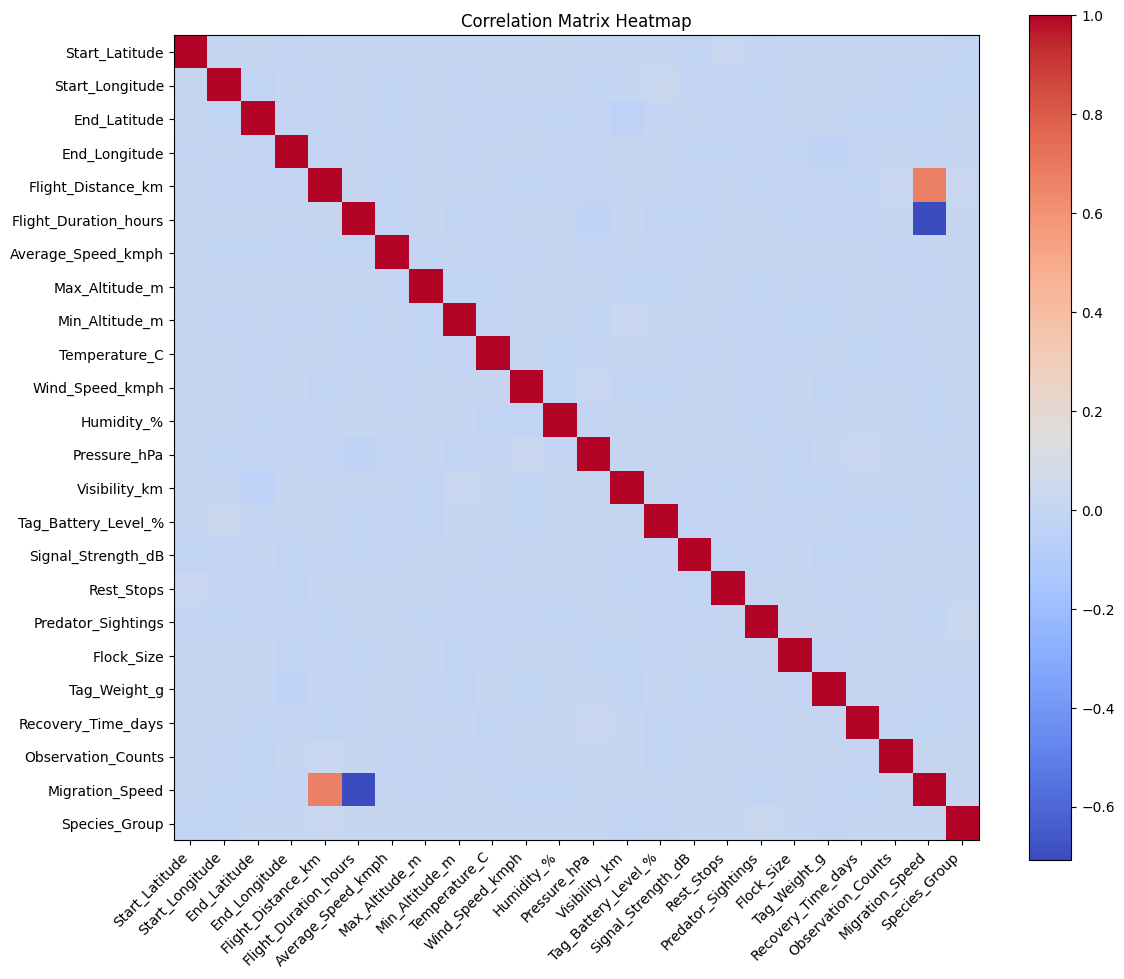


T-test for migration distance between Warbler and Stork:
T-statistic: -2.06
P-value: 0.039


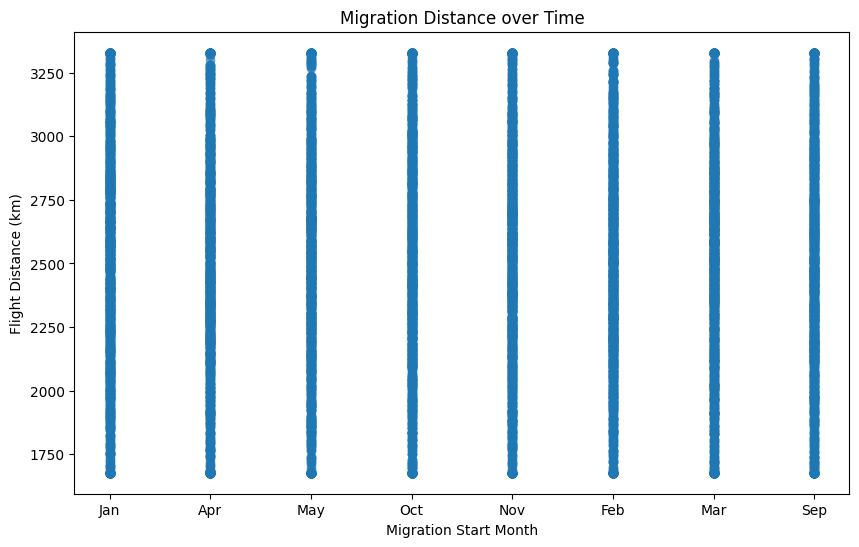

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Descriptive Statistics
print("Descriptive Statistics:\n", df.describe())

# Correlation Analysis
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(numerical_cols)), numerical_cols, rotation=45, ha='right')
plt.yticks(np.arange(len(numerical_cols)), numerical_cols)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Hypothesis Testing (example: t-test for migration distance between species)
species1 = 'Warbler'
species2 = 'Stork'

group1 = df[df['Species'] == species1]['Flight_Distance_km']
group2 = df[df['Species'] == species2]['Flight_Distance_km']

t_statistic, p_value = stats.ttest_ind(group1, group2)
print(f"\nT-test for migration distance between {species1} and {species2}:")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")


# Trend Analysis (example: migration distance over time - assuming 'Migration_Start_Month' is numerical)
plt.figure(figsize=(10,6))
plt.scatter(df['Migration_Start_Month'], df['Flight_Distance_km'], alpha=0.5)
plt.xlabel('Migration Start Month')
plt.ylabel('Flight Distance (km)')
plt.title('Migration Distance over Time')
plt.show()


# Trend Analysis - Regression
# Create dummy variables for categorical features
#categorical_cols = df.select_dtypes(exclude=np.number).columns
#df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# Fit a linear regression model (example)
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()
#X = df_encoded[['Migration_Start_Month', 'Species_Group']] #Example columns
#y = df_encoded['Flight_Distance_km']
#model.fit(X, y)
#predictions = model.predict(X)
#plt.figure(figsize=(10,6))
#plt.scatter(y, predictions, alpha=0.5)
#plt.xlabel('Actual Migration Distance (km)')
#plt.ylabel('Predicted Migration Distance (km)')
#plt.show()